<a href="https://colab.research.google.com/github/AvdheshKumarGiri/Time-series-forecasting-using-ARIMA/blob/main/Time_series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import yfinance as yf


In [ ]:
import datetime

In [ ]:
from datetime import date, timedelta

In [ ]:
today=date.today()

In [ ]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2


In [ ]:
data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

          Date        Open        High         Low       Close   Adj Close  \
246 2023-05-11  115.860001  118.440002  114.930000  116.900002  116.900002   
247 2023-05-12  117.000000  118.260002  116.550003  117.919998  117.919998   
248 2023-05-15  116.489998  118.794998  116.480003  116.959999  116.959999   
249 2023-05-16  116.830002  121.199997  116.830002  120.089996  120.089996   
250 2023-05-17  120.180000  122.279999  119.459999  121.480003  121.480003   

       Volume  
246  57115100  
247  31272500  
248  22107900  
249  32370100  
250  26651400  


In [ ]:
data=data[['Date','Close']]
data.head()

,Date,Close
0,2022-05-18,112.401001
1,2022-05-19,110.745499
2,2022-05-20,109.313004
3,2022-05-23,111.666496
4,2022-05-24,105.926003


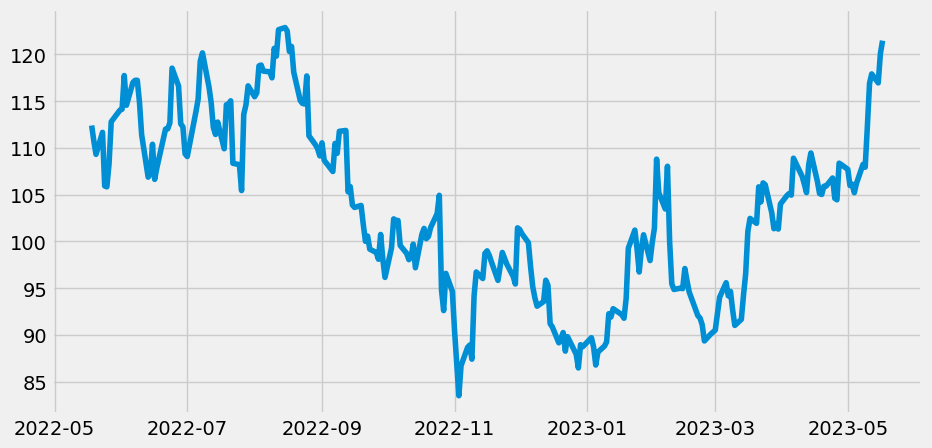

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 5))
plt.plot(data["Date"], data["Close"])

<Figure size 640x480 with 0 Axes>

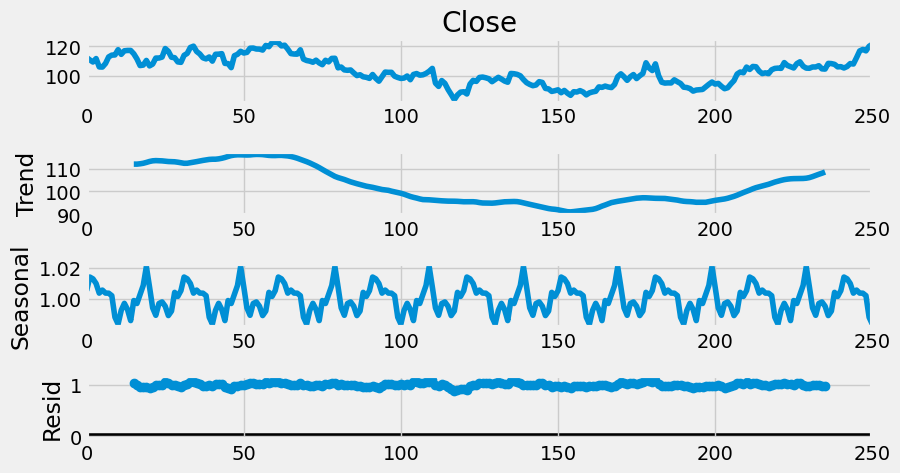

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data["Close"], model='multiplicative', period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(10, 5)


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

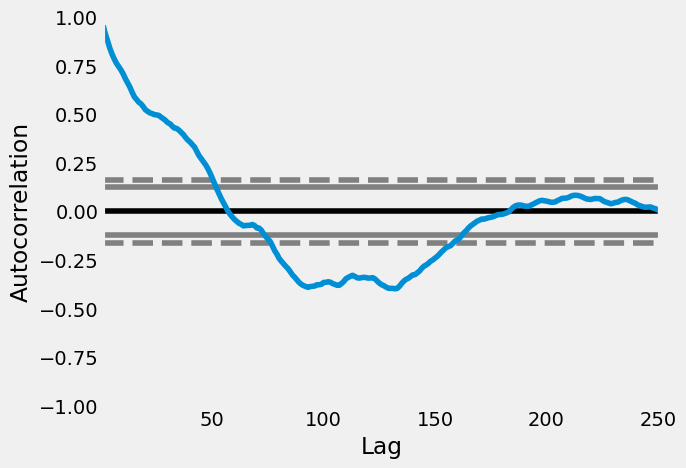

In [ ]:
pd.plotting.autocorrelation_plot(data["Close"])

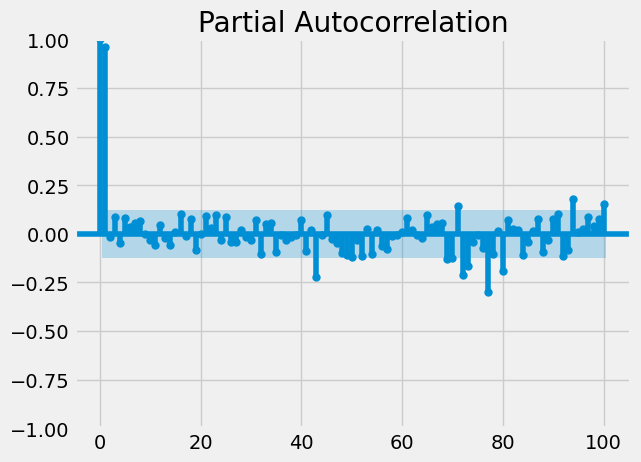

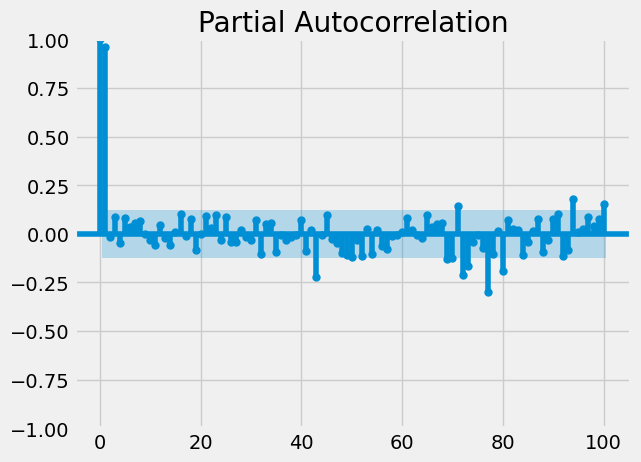

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

p, d, q = 5, 1, 2

model = ARIMA(data["Close"], order=(p, d, q))
fitted = model.fit()

print(fitted.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -583.826
Date:                Thu, 18 May 2023   AIC                           1183.653
Time:                        10:47:55   BIC                           1211.825
Sample:                             0   HQIC                          1194.991
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0163      0.867      0.019      0.985      -1.684       1.716
ar.L2          0.7130      0.872      0.818      0.414      -0.996       2.422
ar.L3         -0.0091      0.120     -0.075      0.9

In [ ]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      112.401011
2      110.721971
3      109.424956
4      111.809012
          ...    
246    112.349414
247    116.413179
248    117.414728
249    116.568546
250    119.713264
Name: predicted_mean, Length: 251, dtype: float64


In [ ]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -573.289
Date:                            Thu, 18 May 2023   AIC                           1176.578
Time:                                    10:53:36   BIC                           1228.662
Sample:                                         0   HQIC                          1197.568
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3777      0.624     -0.605      0.545      -1.601       0.846
ar.L2          0.3728      0.528   

In [ ]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

251    119.811720
252    119.672693
253    121.249735
254    119.944289
255    119.587140
256    119.278048
257    120.101887
258    121.574510
259    121.336835
260    121.411851
261    121.214554
Name: predicted_mean, dtype: float64


<Axes: >

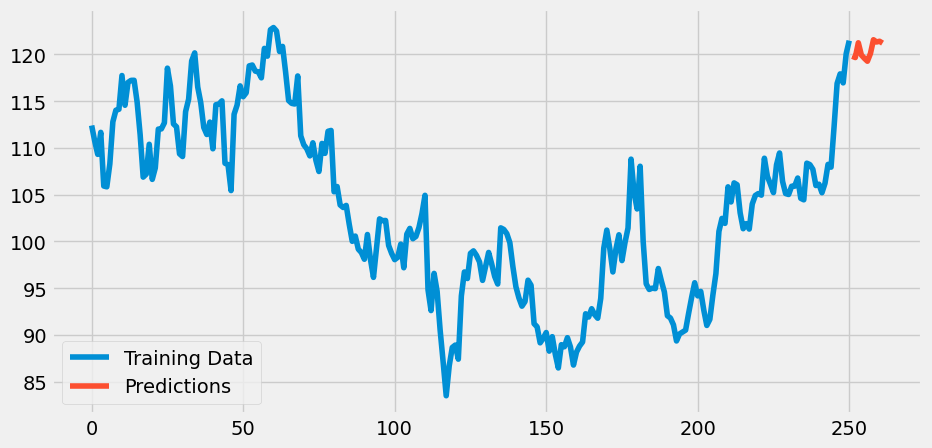

In [ ]:
data["Close"].plot(legend=True, label="Training Data", figsize=(10, 5))
predictions.plot(legend=True, label="Predictions")